In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"z2a1fx","key":"883b760cb1ca1561fe923fb37a9c6718"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

100% 426M/428M [00:05<00:00, 92.9MB/s]
100% 428M/428M [00:05<00:00, 84.1MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip


In [ ]:
import pandas as pd  #audio process korar jonno
import numpy as np
import os  #deal with file
import seaborn as sns  #visualization ar jonno
import matplotlib.pyplot as plt #visualization ar jonno
import librosa #audio library file
import librosa.display #audio library file
from IPython.display import Audio #to play audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname,_, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry


In [ ]:
df['label'].value_counts()

label
angry      400
happy      400
sad        400
fear       400
ps         400
disgust    400
neutral    400
Name: count, dtype: int64

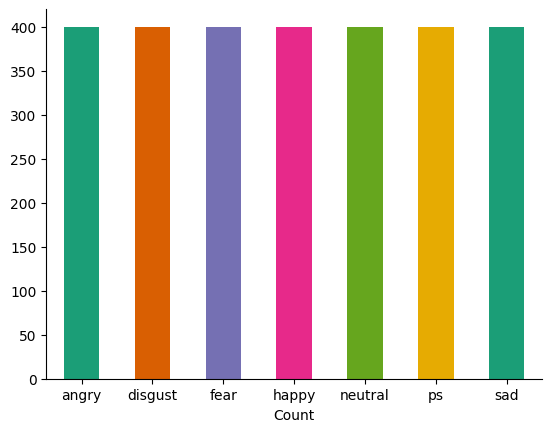

In [ ]:
ax = df.groupby('label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.grid(axis='x', linestyle='', alpha=0.6)
ax.spines[['right', 'top']].set_visible(False)
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#waveform of data ar jonno
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


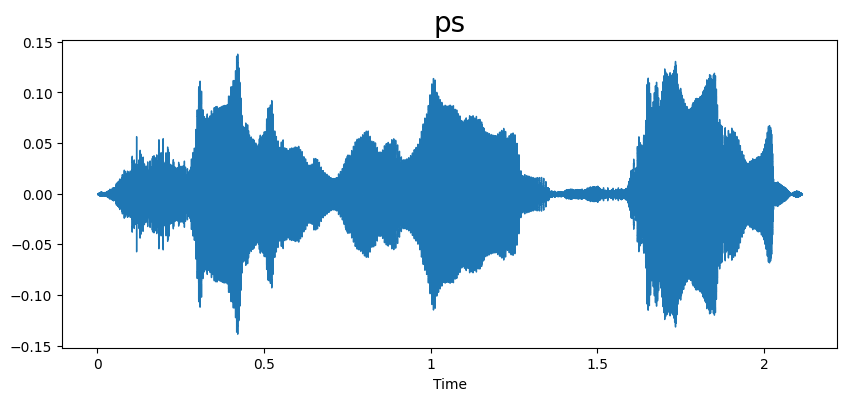

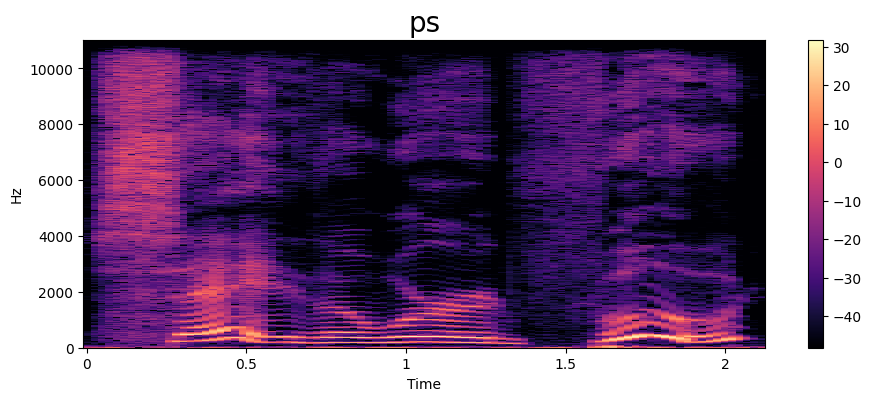

In [ ]:

emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


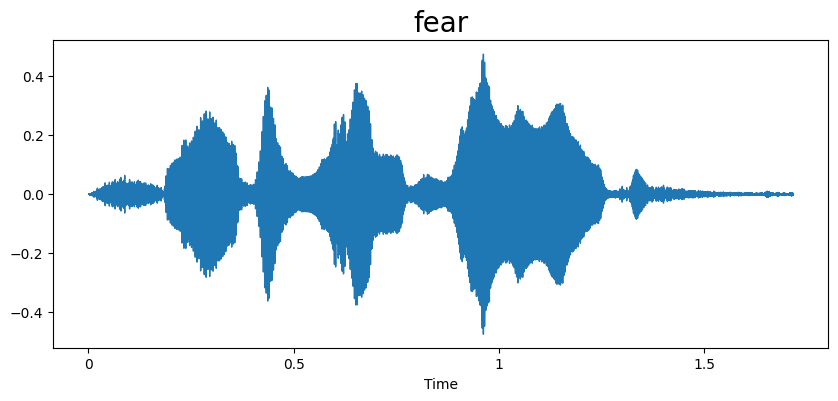

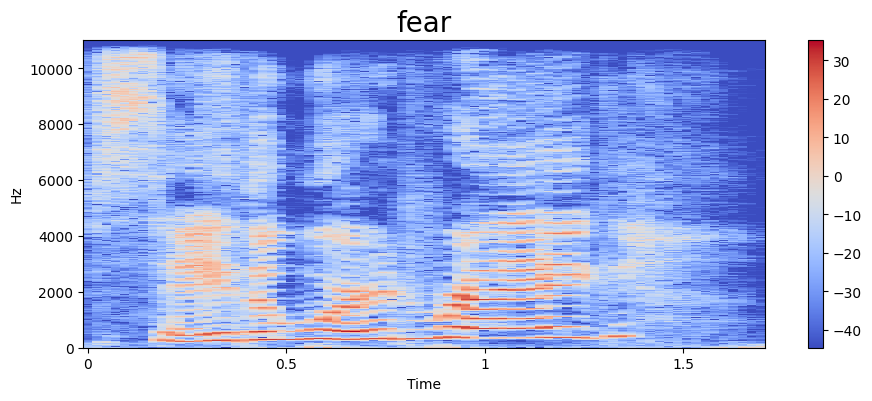

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

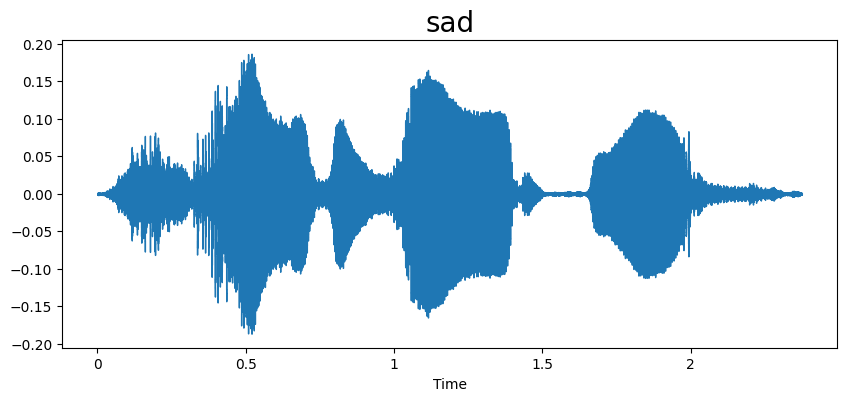

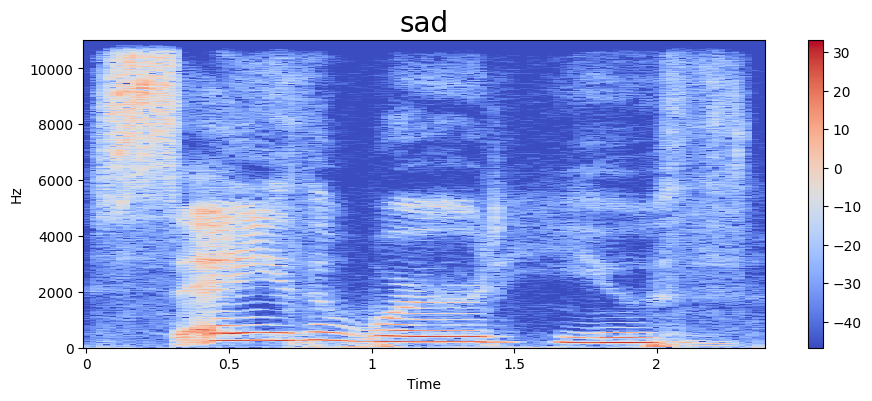

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

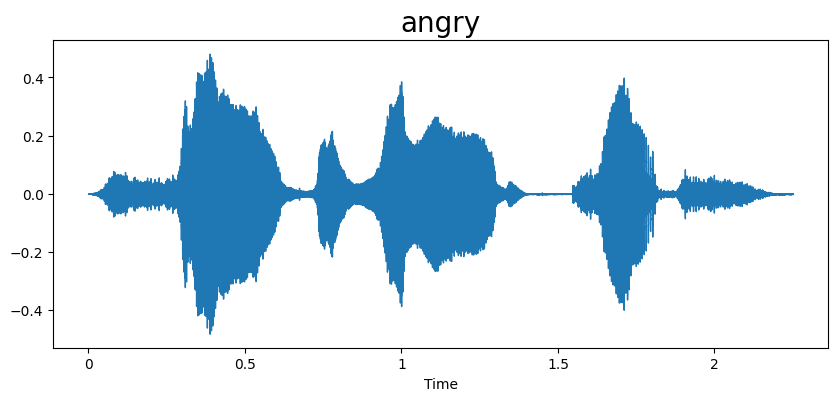

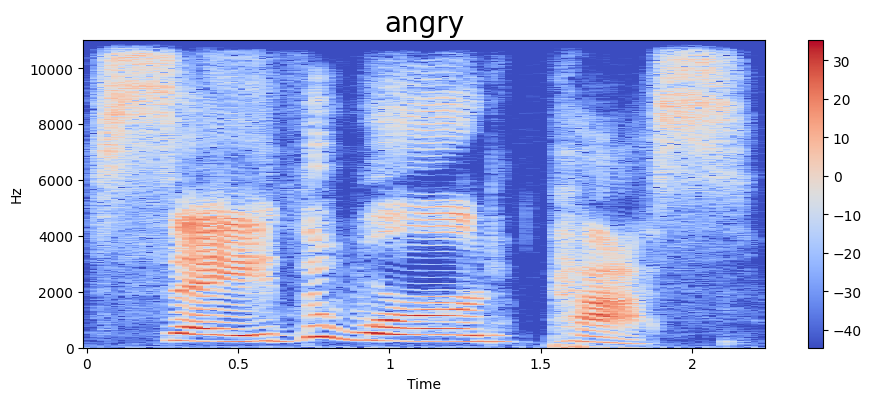

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

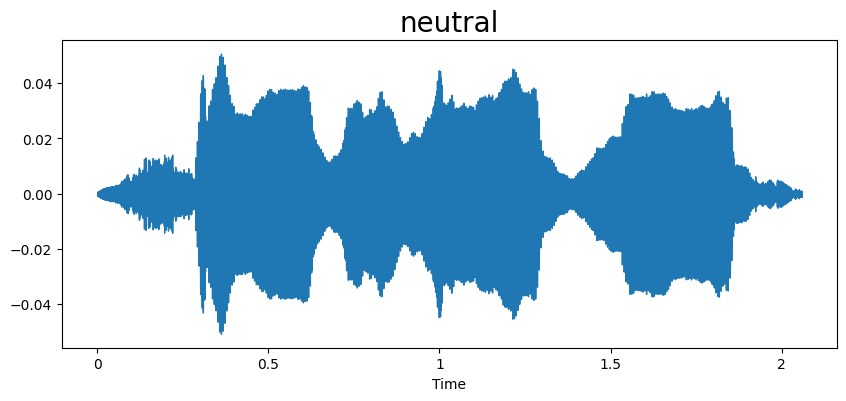

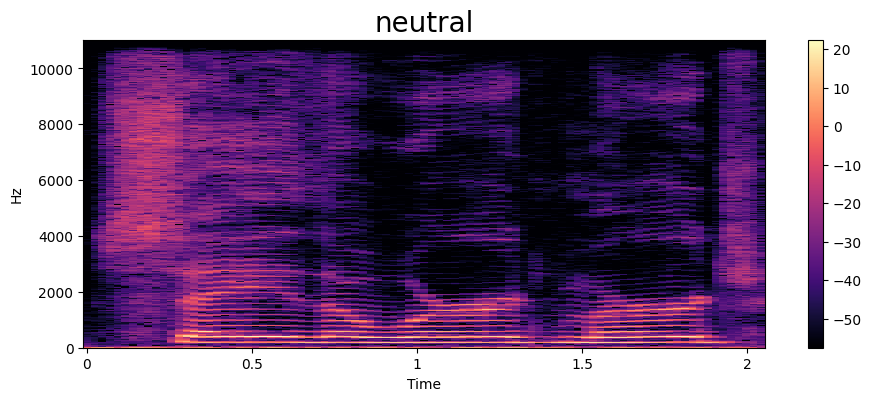

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

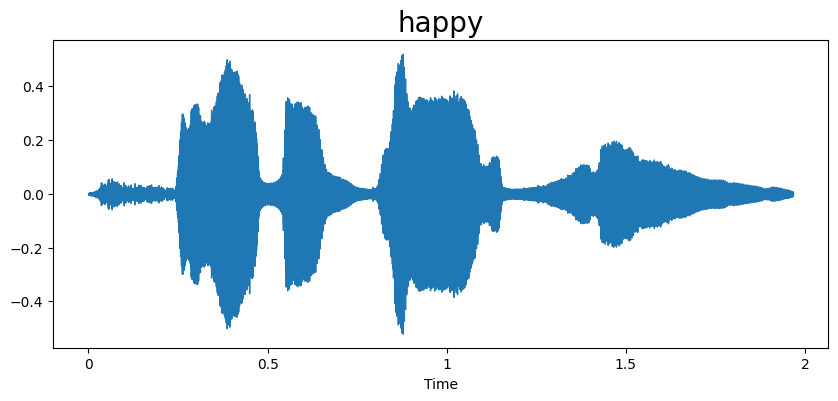

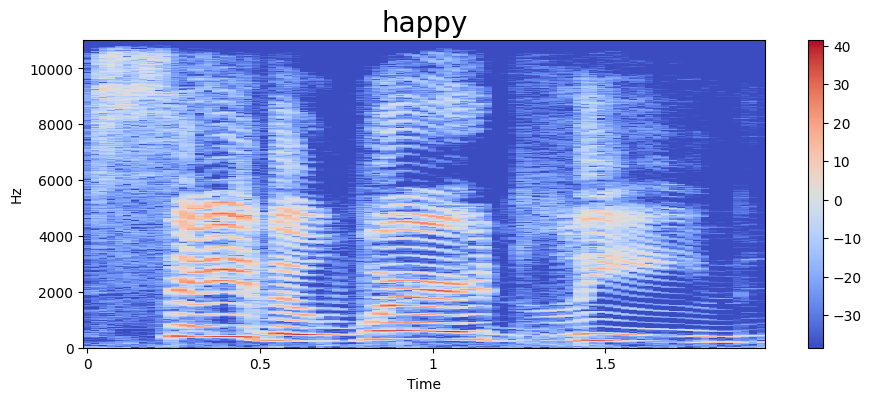

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

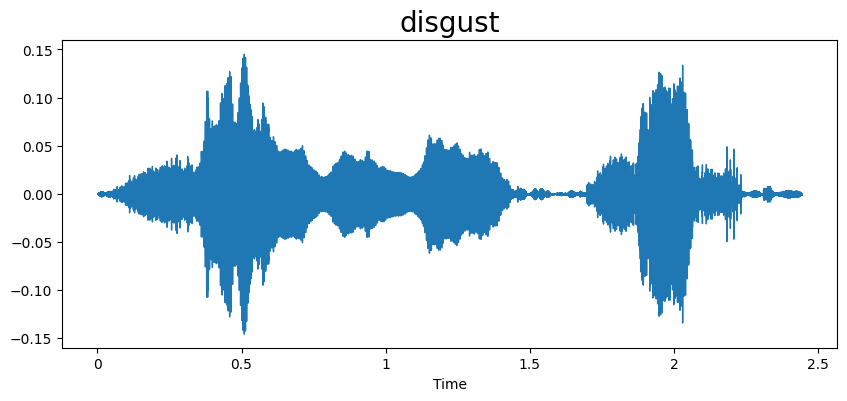

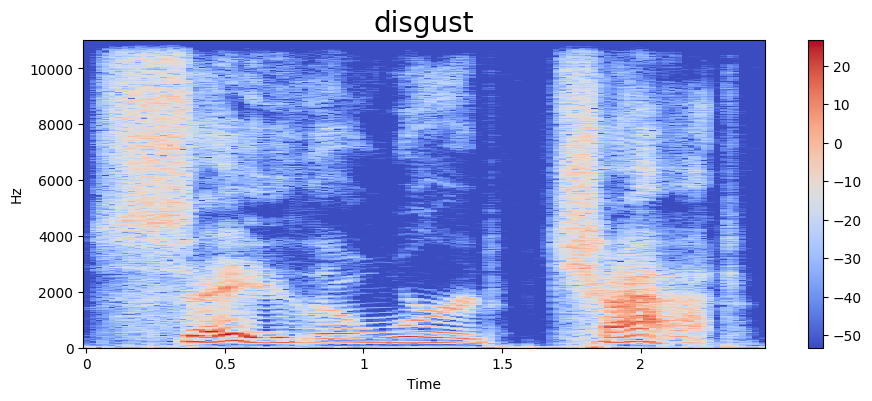

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

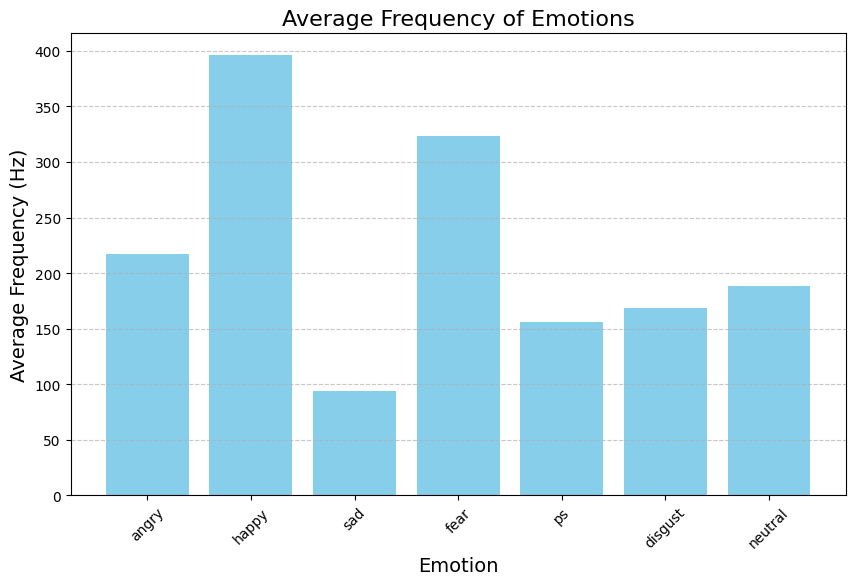

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def average_frequency(data, sr):
    frequencies = []
    for d in data:
        # Calculate the spectrogram
        x = librosa.stft(d)
        xdb = librosa.amplitude_to_db(abs(x))
        # Extract frequencies with highest energy
        max_freq_index = np.argmax(np.mean(xdb, axis=1))
        # Convert frequency bin index to Hz
        max_freq_hz = librosa.fft_frequencies(sr=sr)[max_freq_index]
        frequencies.append(max_freq_hz)
    # Calculate average frequency
    return np.mean(frequencies)

# Assuming df is your dataframe containing audio paths and labels
emotions = df['label'].unique()  # Get unique emotion categories

average_freqs = []  # List to store average frequencies for each emotion
for emotion in emotions:
    paths = np.array(df['speech'][df['label'] == emotion])  # Get paths for all data points in the current emotion category
    data = [librosa.load(path)[0] for path in paths]  # Load audio data for all data points in the current emotion category
    sampling_rate = librosa.load(paths[0])[1]  # Sampling rate (assuming it's the same for all audio clips)
    avg_frequency = average_frequency(data, sampling_rate)  # Calculate average frequency
    average_freqs.append(avg_frequency)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(emotions, average_freqs, color='skyblue')
plt.title('Average Frequency of Emotions', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Average Frequency (Hz)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#extraction mfcc part of preprocess
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.34945923e+02,  3.70755119e+01, -7.90456820e+00, -1.83790684e+00,
       -1.28784685e+01,  6.48743868e+00,  2.52078199e+00, -1.22021313e+01,
       -6.53204012e+00,  1.64398634e+00, -1.77280693e+01,  9.59110737e+00,
       -9.33374500e+00,  7.03533840e+00, -2.34031916e+00, -5.02835369e+00,
       -1.51206696e+00,  4.88031101e+00, -2.85840440e+00,  2.46732163e+00,
       -2.44669652e+00, -1.70657969e+00, -7.33406544e+00, -1.87550449e+00,
       -2.89007664e+00,  2.28449538e-01,  1.87676847e+00,  7.56279325e+00,
        1.12165041e+01,  1.49963121e+01,  1.19341040e+01,  1.10935335e+01,
        4.09022570e+00,  3.95253038e+00,  9.11194146e-01,  4.24853182e+00,
        3.31549644e+00,  4.12816429e+00, -2.26341224e+00, -1.07533288e+00,
       -1.64336324e+00,  3.98158669e+00, -1.11243165e+00, -8.54802370e-01,
       -4.10659170e+00, -8.08297634e-01, -2.51135379e-01,  2.69858575e+00,
       -1.66069591e+00, -1.15179658e+00,  1.13143539e+00,  1.59848392e+00,
       -1.75673831e+00, -

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-334.94592, 37.075512, -7.904568, -1.8379068,...
1       [-350.88992, 74.09218, -2.3219209, 7.8491626, ...
2       [-322.57584, 47.85948, -25.91174, 4.019515, -2...
3       [-289.10486, 78.74502, 2.2043347, -5.4672093, ...
4       [-325.0482, 52.04364, -21.359823, 3.8501308, -...
                              ...                        
2795    [-331.03552, 48.584187, -25.937048, -4.8479657...
2796    [-340.9328, 93.7364, -26.861814, 0.34102386, -...
2797    [-354.5709, 64.17273, -31.288214, 14.938522, -...
2798    [-305.5626, 70.34936, -42.098427, -7.0920105, ...
2799    [-389.8703, 94.92119, -6.0177207, -5.5790243, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
#no of sample and no of feature

(2800, 60)

In [ ]:
# input split

X = np.expand_dims(X, -1)
X.shape

(2800, 60, 1)

In [ ]:
#output column
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y.shape

(2800, 7)